In [62]:
# Import Libraries:
from datetime import datetime, timedelta # Datetime Feature
import pandas as pd # Import Pandas
import pandas_ta as ta
import panel as pn # Import Panel
import numpy as np 
import plotly.express as px # Import Plotly
pn.extension("plotly")# Import Plotly Extension
import matplotlib.pyplot as plt
from pprint import pprint
import requests # To fetch data from our url API
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Import and initialize coinmetrics API (in this case `cm` for the Coinmetrics Community API)
#import coinmetrics # Coinmetrics API
#cm = coinmetrics.Community()

In [63]:
# API INPUTS
asset = "btc"
begin_timestamp = (datetime.now() - timedelta(days=365)).date()
end_timestamp = (datetime.now() - timedelta(days=0)).date()
# end_timestamp = datetime.now().date()


# API OUTPUT (Coinmetrics Community URL API)
asset_data = requests.get(f"https://community-api.coinmetrics.io/v4/timeseries/market-candles?start_time={begin_timestamp}&end_time={end_timestamp}&paging_from=start&markets=coinbase-{asset}-usd-spot&pretty=true").json()
# pprint(asset_data)

In [67]:
# Initiate clean dictionary
data_dictionary = {
    "date" : [],
    "open" : [],
    "close" : [],
    "high" : [],
    "low" : [],
    "volume" : [],
    "vwap" : [],
    "candle_usd" : [],
    "candle_trades" : [],

    
}

# Use For Loop to interate through data and populate dictionary
for entry in asset_data['data']:
    data_dictionary['date'].append(entry['time'])
    data_dictionary['open'].append(float(entry['price_open']))
    data_dictionary['close'].append(float(entry['price_close']))
    data_dictionary['high'].append(float(entry['price_high']))
    data_dictionary['low'].append(float(entry['price_low']))
    data_dictionary['volume'].append(float(entry['volume']))
    data_dictionary['vwap'].append(float(entry['vwap']))
    data_dictionary['candle_usd'].append(float(entry['candle_usd_volume']))
    data_dictionary['candle_trades'].append(float(entry['candle_trades_count']))
    

#Convert dictionary into Pandas dataframe and format to two decimals
asset_data_df = pd.DataFrame.from_dict(data_dictionary)
pd.options.display.float_format = "{:,.2f}".format
# INSERT HERE >>> FIND WAY TO CLEAN DATE DATA

# View dataframe
asset_data_df.head()

,date,open,close,high,low,volume,vwap,candle_usd,candle_trades
0,2020-11-20T00:00:00.000000000Z,"17,821.92","18,675.25","18,830.30","17,764.76","17,901.93","18,406.84","329,518,026.36","152,563.00"
1,2020-11-21T00:00:00.000000000Z,"18,677.84","18,721.21","18,980.00","18,350.00","13,604.27","18,733.99","254,862,327.16","143,886.00"
2,2020-11-22T00:00:00.000000000Z,"18,721.21","18,437.66","18,773.56","17,610.77","15,423.84","18,365.41","283,265,099.36","141,941.00"
3,2020-11-23T00:00:00.000000000Z,"18,437.18","18,384.82","18,777.77","18,001.00","17,655.66","18,413.15","325,096,219.05","145,624.00"
4,2020-11-24T00:00:00.000000000Z,"18,384.82","19,172.84","19,469.00","18,052.02","26,622.85","18,966.00","504,928,989.80","212,100.00"


In [109]:
asset_data_df['macd_column'] = (asset_data_df['open'] - asset_data_df['close']) / asset_data_df['volume']

In [110]:
asset_data_df

,date,open,close,high,low,volume,vwap,candle_usd,candle_trades,macd_column
0,2020-11-20T00:00:00.000000000Z,"17,821.92","18,675.25","18,830.30","17,764.76","17,901.93","18,406.84","329,518,026.36","152,563.00",-0.05
1,2020-11-21T00:00:00.000000000Z,"18,677.84","18,721.21","18,980.00","18,350.00","13,604.27","18,733.99","254,862,327.16","143,886.00",-0.00
2,2020-11-22T00:00:00.000000000Z,"18,721.21","18,437.66","18,773.56","17,610.77","15,423.84","18,365.41","283,265,099.36","141,941.00",0.02
3,2020-11-23T00:00:00.000000000Z,"18,437.18","18,384.82","18,777.77","18,001.00","17,655.66","18,413.15","325,096,219.05","145,624.00",0.00
4,2020-11-24T00:00:00.000000000Z,"18,384.82","19,172.84","19,469.00","18,052.02","26,622.85","18,966.00","504,928,989.80","212,100.00",-0.03
...,...,...,...,...,...,...,...,...,...,...
95,2021-02-23T00:00:00.000000000Z,"54,125.67","48,899.99","54,206.22","44,888.08","72,300.59","48,389.10","3,498,560,472.91","1,043,505.00",0.07
96,2021-02-24T00:00:00.000000000Z,"48,899.99","49,737.82","51,415.41","47,002.00","30,732.15","49,689.56","1,527,067,054.21","501,491.00",-0.03
97,2021-02-25T00:00:00.000000000Z,"49,737.81","47,063.56","52,107.83","46,700.00","28,011.20","49,751.66","1,393,603,905.98","428,365.00",0.10
98,2021-02-26T00:00:00.000000000Z,"47,052.15","46,326.20","48,464.64","44,150.00","36,048.62","46,562.87","1,678,527,235.51","568,463.00",0.02


In [70]:
DataFrame = asset_data_df

In [72]:
df = DataFrame

In [73]:
df.mean()

open                 31,846.45
close                32,130.78
high                 33,208.41
low                  30,422.44
volume               27,184.36
vwap                 31,906.36
candle_usd      912,187,459.56
candle_trades       293,609.20
dtype: float64

In [74]:
df.corr()

,open,close,high,low,volume,vwap,candle_usd,candle_trades
open,1.00,0.99,0.99,0.99,0.29,0.99,0.63,0.67
close,0.99,1.00,1.00,0.99,0.27,1.00,0.61,0.64
high,0.99,1.00,1.00,0.99,0.32,1.00,0.65,0.68
low,0.99,0.99,0.99,1.00,0.20,1.00,0.55,0.59
volume,0.29,0.27,0.32,0.20,1.00,0.26,0.90,0.85
vwap,0.99,1.00,1.00,1.00,0.26,1.00,0.60,0.63
candle_usd,0.63,0.61,0.65,0.55,0.90,0.60,1.00,0.98
candle_trades,0.67,0.64,0.68,0.59,0.85,0.63,0.98,1.00


In [75]:
df.max

<bound method NDFrame._add_numeric_operations.<locals>.max of                               date      open     close      high       low  \
0   2020-11-20T00:00:00.000000000Z 17,821.92 18,675.25 18,830.30 17,764.76   
1   2020-11-21T00:00:00.000000000Z 18,677.84 18,721.21 18,980.00 18,350.00   
2   2020-11-22T00:00:00.000000000Z 18,721.21 18,437.66 18,773.56 17,610.77   
3   2020-11-23T00:00:00.000000000Z 18,437.18 18,384.82 18,777.77 18,001.00   
4   2020-11-24T00:00:00.000000000Z 18,384.82 19,172.84 19,469.00 18,052.02   
..                             ...       ...       ...       ...       ...   
95  2021-02-23T00:00:00.000000000Z 54,125.67 48,899.99 54,206.22 44,888.08   
96  2021-02-24T00:00:00.000000000Z 48,899.99 49,737.82 51,415.41 47,002.00   
97  2021-02-25T00:00:00.000000000Z 49,737.81 47,063.56 52,107.83 46,700.00   
98  2021-02-26T00:00:00.000000000Z 47,052.15 46,326.20 48,464.64 44,150.00   
99  2021-02-27T00:00:00.000000000Z 46,319.79 46,180.75 48,356.86 45,055.00   

 

In [76]:
df.min

<bound method NDFrame._add_numeric_operations.<locals>.min of                               date      open     close      high       low  \
0   2020-11-20T00:00:00.000000000Z 17,821.92 18,675.25 18,830.30 17,764.76   
1   2020-11-21T00:00:00.000000000Z 18,677.84 18,721.21 18,980.00 18,350.00   
2   2020-11-22T00:00:00.000000000Z 18,721.21 18,437.66 18,773.56 17,610.77   
3   2020-11-23T00:00:00.000000000Z 18,437.18 18,384.82 18,777.77 18,001.00   
4   2020-11-24T00:00:00.000000000Z 18,384.82 19,172.84 19,469.00 18,052.02   
..                             ...       ...       ...       ...       ...   
95  2021-02-23T00:00:00.000000000Z 54,125.67 48,899.99 54,206.22 44,888.08   
96  2021-02-24T00:00:00.000000000Z 48,899.99 49,737.82 51,415.41 47,002.00   
97  2021-02-25T00:00:00.000000000Z 49,737.81 47,063.56 52,107.83 46,700.00   
98  2021-02-26T00:00:00.000000000Z 47,052.15 46,326.20 48,464.64 44,150.00   
99  2021-02-27T00:00:00.000000000Z 46,319.79 46,180.75 48,356.86 45,055.00   

 

In [77]:
df.min

<bound method NDFrame._add_numeric_operations.<locals>.min of                               date      open     close      high       low  \
0   2020-11-20T00:00:00.000000000Z 17,821.92 18,675.25 18,830.30 17,764.76   
1   2020-11-21T00:00:00.000000000Z 18,677.84 18,721.21 18,980.00 18,350.00   
2   2020-11-22T00:00:00.000000000Z 18,721.21 18,437.66 18,773.56 17,610.77   
3   2020-11-23T00:00:00.000000000Z 18,437.18 18,384.82 18,777.77 18,001.00   
4   2020-11-24T00:00:00.000000000Z 18,384.82 19,172.84 19,469.00 18,052.02   
..                             ...       ...       ...       ...       ...   
95  2021-02-23T00:00:00.000000000Z 54,125.67 48,899.99 54,206.22 44,888.08   
96  2021-02-24T00:00:00.000000000Z 48,899.99 49,737.82 51,415.41 47,002.00   
97  2021-02-25T00:00:00.000000000Z 49,737.81 47,063.56 52,107.83 46,700.00   
98  2021-02-26T00:00:00.000000000Z 47,052.15 46,326.20 48,464.64 44,150.00   
99  2021-02-27T00:00:00.000000000Z 46,319.79 46,180.75 48,356.86 45,055.00   

 

In [78]:
df.median()

open                 32,276.85
close                32,399.69
high                 33,933.50
low                  30,055.50
volume               23,193.59
vwap                 32,075.96
candle_usd      746,400,042.49
candle_trades       249,999.50
dtype: float64

In [79]:
df.std()

open                 11,309.37
close                11,310.93
high                 11,844.73
low                  10,571.21
volume               15,528.10
vwap                 11,249.21
candle_usd      657,984,974.90
candle_trades       168,237.95
dtype: float64

In [80]:
pd.isnull('TRUE')

False

In [81]:
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

btc_macd = get_macd(df['close'], 26, 12, 9)
btc_macd.tail()

,macd,signal,hist
95,"4,553.07","4,505.49",47.59
96,"4,117.70","4,427.93",-310.23
97,"3,516.35","4,245.61",-729.27
98,"2,946.31","3,985.75","-1,039.45"
99,"2,454.51","3,679.50","-1,224.99"


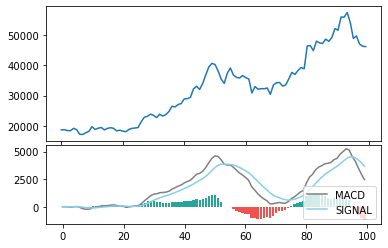

In [82]:
# calculated/created a function for MACD conponents

def plot_macd(prices, macd, signal, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

plot_macd(df['close'], btc_macd['macd'], btc_macd['signal'], btc_macd['hist'])

In [88]:
# Creating out trading stragegy

def implement_macd_strategy(prices, df):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(df)):
        if df['macd'][i] > df['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif df['macd'][i] < df['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal
            
buy_price, sell_price, macd_signal = implement_macd_strategy(df['close'], btc_macd)


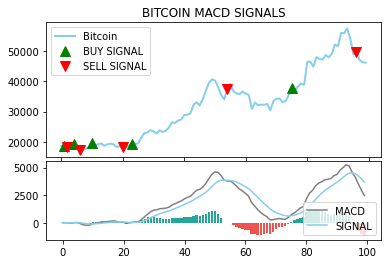

In [93]:
# Creating our trading list

ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(df['close'], color = 'skyblue', linewidth = 2, label = 'Bitcoin')
ax1.plot(df.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(df.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('BITCOIN MACD SIGNALS')
ax2.plot(btc_macd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(btc_macd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

for i in range(len(btc_macd)):
    if str(btc_macd['hist'][i])[0] == '-':
        ax2.bar(btc_macd.index[i], btc_macd['hist'][i], color = '#ef5350')
    else:
        ax2.bar(btc_macd.index[i], btc_macd['hist'][i], color = '#26a69a')
        
plt.legend(loc = 'lower right')
plt.show()

In [112]:
#  strategic position  

def macd_position(prices, df): 
    for i in range(len(macd_signal)):
        if macd_signal[i] > 1:
            position.append(0)
        else:
            position.append(1)
        
        
# macd = btc_macd['macd']
# signal = btc_macd['signal']
# close_price = df['close']
# macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'signal'}).set_index(df.index)
# position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(df.index)

# frames = [close_price, macd, signal, macd_signal, position]
# strategy = pd.concat(frames, join = 'inner', axis = 1)

# strategy

In [102]:
macd_signal

,macd_signal
0,0
1,1
2,-1
3,0
4,1
...,...
95,0
96,-1
97,0
98,0


In [122]:
macd_returns = pd.DataFrame(np.diff(df['close'])).rename(columns = {2:'returns'}) 

In [123]:
macd_returns

,0
0,45.96
1,-283.55
2,-52.84
3,788.02
4,-450.91
...,...
94,"-5,242.14"
95,837.83
96,"-2,674.26"
97,-737.36


In [127]:
# macd_returns = pd.DataFrame(np.diff(df['close'])).rename(columns = {2:'returns'})
# macd_strategy_ret = []

macd_returns = pd.DataFrame(np.diff(df['close'])).rename(columns = {2:'returns'})
for i in range(len(macd_returns)):
    try:
#         returns = macd_returns['returns'][i]*strategy['macd_position'][i]
#         macd_strategy_ret.append(returns)
#     except:
#         pass
    
# macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {2:'macd_returns'})

# investment_value = 10000
# number_of_stocks = np.floor(investment_value/df['close'][2])
# macd_investment_ret = []

# for i in range(len(macd_strategy_ret_df['macd_returns'])):
#     returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
#     macd_investment_ret.append(returns)

# macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {2:'investment_returns'})
# total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
# profit_percentage = np.floor((total_investment_ret/investment_value)*100)
# print(cl('Profit gained from the MACD strategy by investing $100k in Bitcoin : {}'.format(total_investment_ret), attrs = ['bold']))
# print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))

In [128]:
macd_returns

,0
0,45.96
1,-283.55
2,-52.84
3,788.02
4,-450.91
...,...
94,"-5,242.14"
95,837.83
96,"-2,674.26"
97,-737.36


In [99]:
def get_benchmark(start_date, investment_value):
    spy = get_asset_data_df('SPY', start_date)['close']
    benchmark = pd.DataFrame(np.diff(spy)).rename(columns = {0:'benchmark_returns'})
    
    investment_value = investment_value
    number_of_stocks = floor(investment_value/spy[1000)
    benchmark_investment_ret = []
    
    for i in range(len(benchmark['benchmark_returns'])):
        returns = number_of_stocks*benchmark['benchmark_returns'][i]
        benchmark_investment_ret.append(returns)

    benchmark_investment_ret_df = pd.DataFrame(benchmark_investment_ret).rename(columns = {0:'investment_returns'})
    return benchmark_investment_ret_df

benchmark = get_benchmark('2020-08-21', 100000)

investment_value = 100000
total_benchmark_investment_ret = round(sum(benchmark['investment_returns']), 2)
benchmark_profit_percentage = floor((total_benchmark_investment_ret/investment_value)*100)
print(cl('Benchmark profit by investing $100k : {}'.format(total_benchmark_investment_ret), attrs = ['bold']))
print(cl('Benchmark Profit percentage : {}%'.format(benchmark_profit_percentage), attrs = ['bold']))
print(cl('MACD Strategy profit is {}% higher than the Benchmark Profit'.format(profit_percentage - benchmark_profit_percentage), attrs = ['bold']))

SyntaxError: invalid syntax (<ipython-input-99-e83bc7c5644a>, line 6)